In [1]:
import pandas as pd 
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import re

## Read the sport category

In [2]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [3]:
def keyword_searcher(df, keywords):
    return df[df.apply(lambda row: any([bool(re.search(keyword, row['tags'], re.IGNORECASE)) or bool(re.search(keyword, row['title'], re.IGNORECASE)) for keyword in keywords]), axis=1)].copy()


eurocup_df = keyword_searcher(filtered_df_sport_category, ['eurocup', 'euro cup', 'euro-cup', "UEFA Euro"])

In [4]:
eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])

eurocup_df['year'] = eurocup_df['upload_date'].dt.year
eurocup_df['month'] = eurocup_df['upload_date'].dt.month
eurocup_df['day'] = eurocup_df['upload_date'].dt.day

# sort values by date
eurocup_df.sort_values(by='upload_date', inplace=True)
eurocup_df.reset_index(drop=True, inplace=True)

In [5]:
eurocup_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
0,Sports,UCLScbM994Dn7myKJR1fsLug,2019-11-12 22:25:01.871666,122.0,E1CR-VP_dtw,187,557.0,"fifa,soccer,08,2008,xbox,360,ea,sports,goal,of...",UEFA Euro 2008,2008-03-28,636497.0,2008,3,28
1,Sports,UCLScbM994Dn7myKJR1fsLug,2019-11-12 22:25:01.279613,13.0,NTwjxHq9xLc,214,64.0,"fifa,08,2008,soccer,football,sweetpatch,wepeel...","UEFA EURO 2008 ""It's Going Down""",2008-04-10,48230.0,2008,4,10
2,Sports,UCLScbM994Dn7myKJR1fsLug,2019-11-12 22:25:00.691071,6.0,iaTK01zPt1M,172,40.0,"uefa,euro,2008,08,score,goal,germany,france,he...","UEFA EURO 2008 ""Get Tricky""",2008-05-01,21200.0,2008,5,1
3,Sports,UCJz3WuXcsB-1KAeWOSfhY0Q,2019-11-07 03:10:00.627809,12.0,KjOoL04a1_s,351,58.0,"Bern,UEFA,Euro,2008,football,match,atmosphere,...",UEFA Euro 2008 - Atmosphere in Bern before foo...,2008-06-13,27069.0,2008,6,13
4,Sports,UCC0jfic1m5dOIAbUvRnJd_w,2019-10-30 15:08:02.300451,9.0,4th1IxHgrFk,241,263.0,"Michael,Jordan,Paul,Pierce,celtics,finals,kevi...",Allen Iverson Debut 15pts Besiktas Cola Turka ...,2010-11-17,184944.0,2010,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,Sports,UCGr3nR_XH9r6E5b09ZJAT9w,2019-11-04 14:49:37.503660,0.0,tbcigOfeVqY,18,17.0,"2019-20 season,Final Four,regular season,round...","7DAYS Magic Moment of the Night: Vince Hunter,...",2019-10-02,771.0,2019,10,2
5740,Sports,UCGr3nR_XH9r6E5b09ZJAT9w,2019-11-04 14:49:36.713245,0.0,p0fqjjwkoxk,19,23.0,"2019-20 season,Final Four,regular season,round...",7DAYS EuroCup Block of the Round: Octavius Ell...,2019-10-02,944.0,2019,10,2
5741,Sports,UC2URAijrHF32dMIwjnyppEw,2019-11-21 15:32:21.818709,9.0,PJFeMVTUd_c,302,346.0,Euro Cup 2012 Commentaries •• Peter Drury •• P...,"Peter Drury : Euro 2012 Commentaries ft. Reus,...",2019-10-02,20185.0,2019,10,2
5742,Sports,UCGr3nR_XH9r6E5b09ZJAT9w,2019-11-04 14:49:34.488016,5.0,XFMnIZaF2vk,157,167.0,"2019-20 season,Final Four,regular season,round...",7DAYS EuroCup Regular Season Round 1 Top 10 Plays,2019-10-03,19376.0,2019,10,3


### Analysis

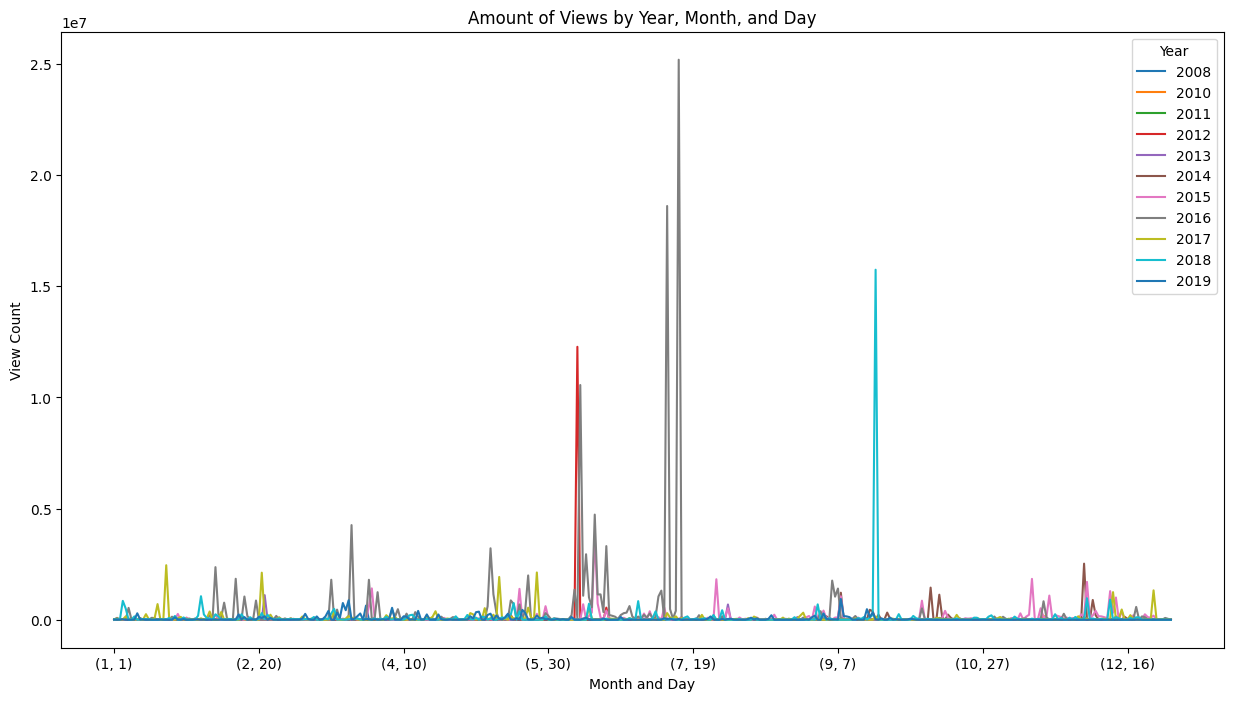

In [6]:

# Group by year, month, and day
grouped_df = eurocup_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

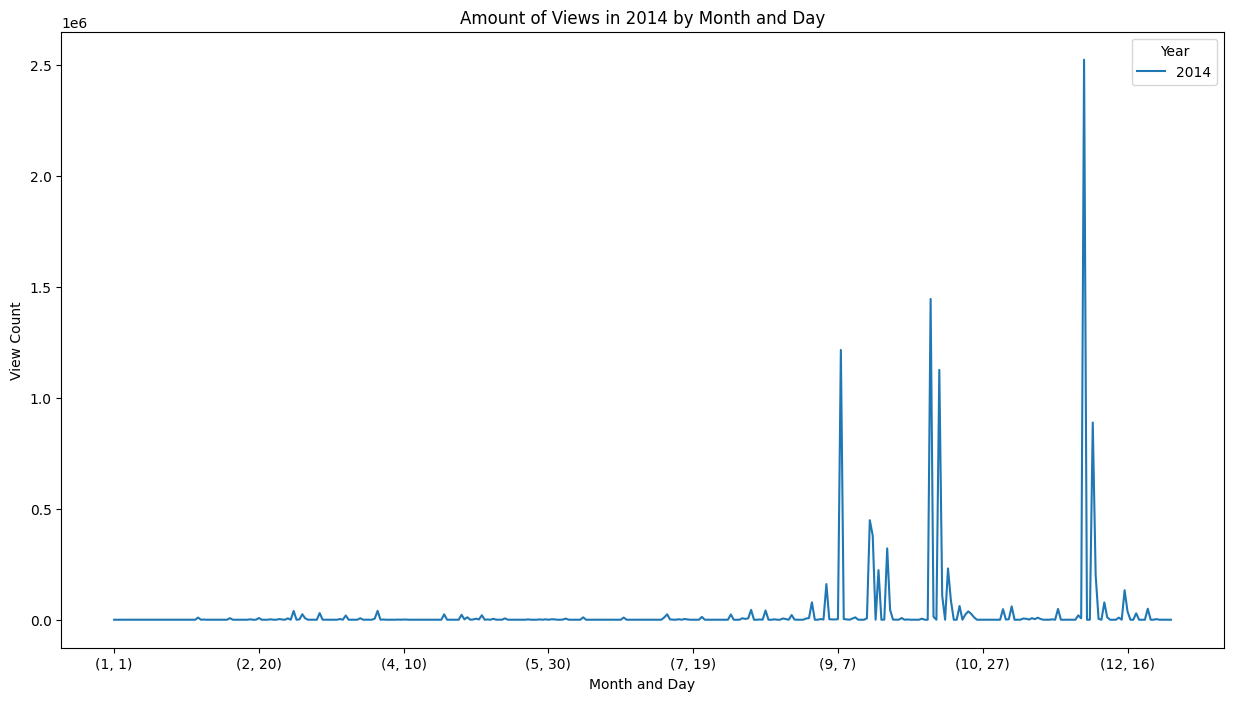

In [7]:
# Filter the pivot_df to include only the column for 2014
pivot_df_2014 = pivot_df[[2014]]

# Plot
pivot_df_2014.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views in 2014 by Month and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

## Read the filtered metadata by keywords

In [8]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_metadata(by_tags_and_title)_without_description_column_and_gaming_category.parquet')

### Do general analysis on football

In [9]:
keywords = ['football', 'soccer', 'fifa']

eurocup_df = keyword_searcher(filtered_df_sport_category, keywords)


In [10]:
eurocup_df['upload_date'] = pd.to_datetime(eurocup_df['upload_date'])

eurocup_df['year'] = eurocup_df['upload_date'].dt.year
eurocup_df['month'] = eurocup_df['upload_date'].dt.month
eurocup_df['day'] = eurocup_df['upload_date'].dt.day

# sort values by date
eurocup_df.sort_values(by='upload_date', inplace=True)
eurocup_df.reset_index(drop=True, inplace=True)

In [11]:
eurocup_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
0,Entertainment,UCSXWt3Q5KZPTo_3Xjh-gkVQ,2019-11-14 00:16:21.175746,5.0,kKvKQ0baa8A,111,15.0,"skateboarding,skateing,football,fat,stupid,sex...",Quality TV intro,2005-10-27,9860.0,2005,10,27
1,Comedy,UCCHcEUksSVKsRDH86j77Ntg,2019-10-31 13:22:52.080618,443.0,l4FoJa3psgI,269,10354.0,"lonely,island,football,town,channel,101,jorma,...",Football Town,2005-12-28,2065893.0,2005,12,28
2,Sports,UCk1pcWQ5E19g0Cgp4c1eI1w,2019-11-02 07:06:21.894435,2.0,KeFnfTaV-1o,259,29.0,"ussoccer.com,all_access,USA,MNT,Soccer,World,C...","MNT Visits Troops in Kaiserslautern, Germany",2006-03-17,8796.0,2006,3,17
3,Comedy,UCEAWeZYuBQxsZ3lHyUxqlSQ,2019-10-29 18:21:29.153791,5.0,3FoFOQBL0Ho,22,10.0,"trampoline,football,kick,fall,backflip,frint,flip",Trampoline Football,2006-04-01,9575.0,2006,4,1
4,Sports,UCcRgQf-j9K_84jPSrEZKs1Q,2019-11-13 22:34:44.277051,115.0,oBXshy_Md_4,211,159.0,"soccer,tricks,joga,bonito",Soccer Tricks joga bonito,2006-04-13,194632.0,2006,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961292,Sports,UCU5R3m5mJIIIQpg1S7I7kcA,2019-11-02 12:38:34.887935,4.0,bf_96HpHRSM,5885,110.0,"nfl betting lines,nfl betting,nfl picks,nfl od...","Rams-Seahawks Thursday Night Football Picks, N...",2019-10-03,2852.0,2019,10,3
961293,Sports,UC1NaxAHgXHhkjqHn9zXSeMw,2019-10-29 17:31:29.624327,23.0,bQ4755r2ris,381,1271.0,"4 Assists in 1 Match,4 Assists in 1 Game,Four ...",FOUR Legendary Assists in 1 Match - FIRST Time...,2019-10-03,79291.0,2019,10,3
961294,Sports,UC1LGN9tjE8Z2zv22JgtAJHg,2019-11-23 08:30:17.716835,NaN,uW2_8VSI-tk,371,NaN,"Top Billin Sports,Florida vs Auburn,Auburn Tig...",Auburn vs. UF: Game within the Game!! Sick!,2019-10-03,9838.0,2019,10,3
961295,Entertainment,UCfj2gEh0pgMS3binrHrV3Lw,2019-11-20 01:49:14.287063,128.0,MwUSPsz8HLc,281,1449.0,DORAH & SHEIK MANALA New Ugandan Comedy 2019 H...,"FUNNIEST FOOTBALL DANCE Martin,JOKA,FULLSTOP...",2019-10-03,193626.0,2019,10,3


#### Analysis

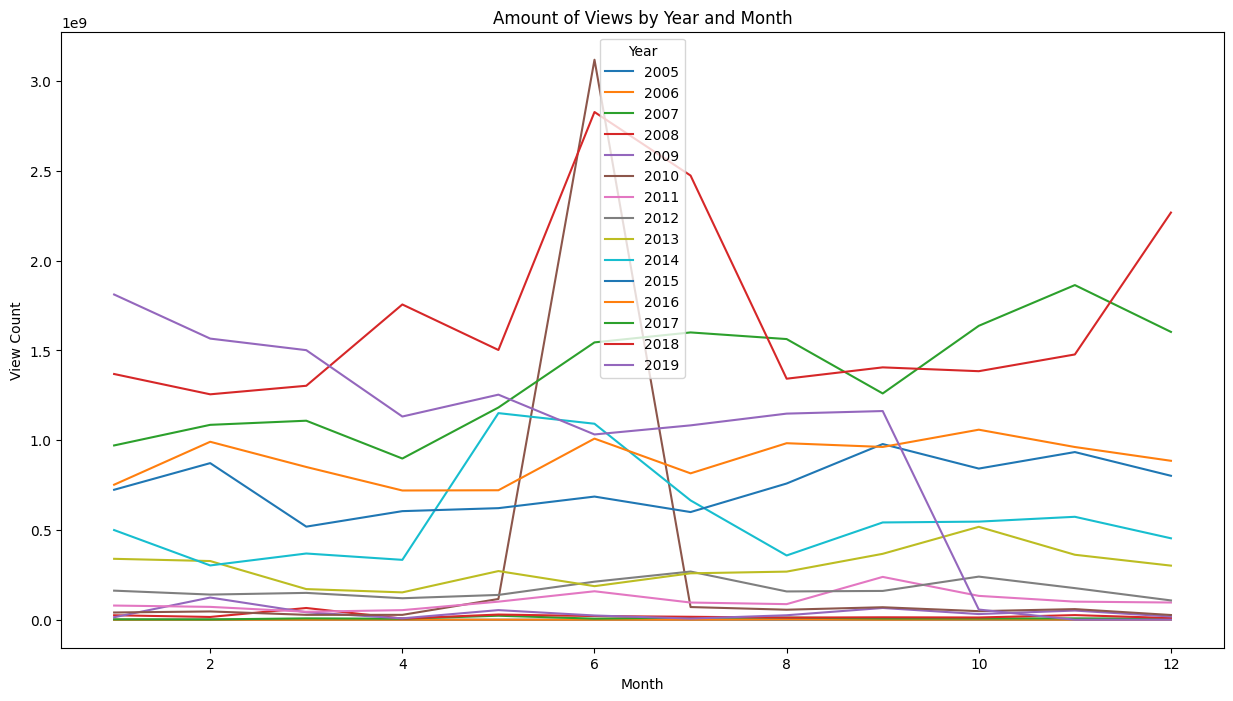

In [12]:
# Group by year and month and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_df = grouped_df.pivot_table(index='month', columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year and Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

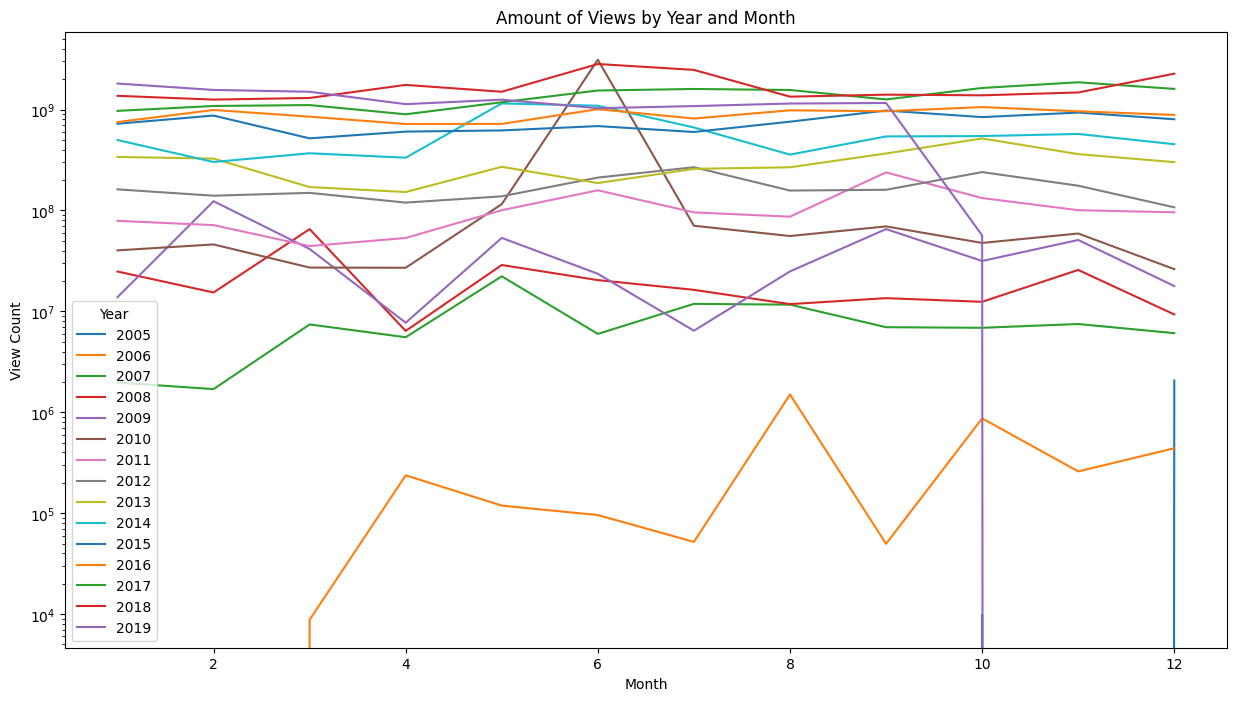

In [13]:
# Group by year and month and sum the view counts
grouped_df = eurocup_df.groupby(['year', 'month'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_df = grouped_df.pivot_table(index='month', columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year and Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.yscale('log')
plt.legend(title='Year')
plt.show()

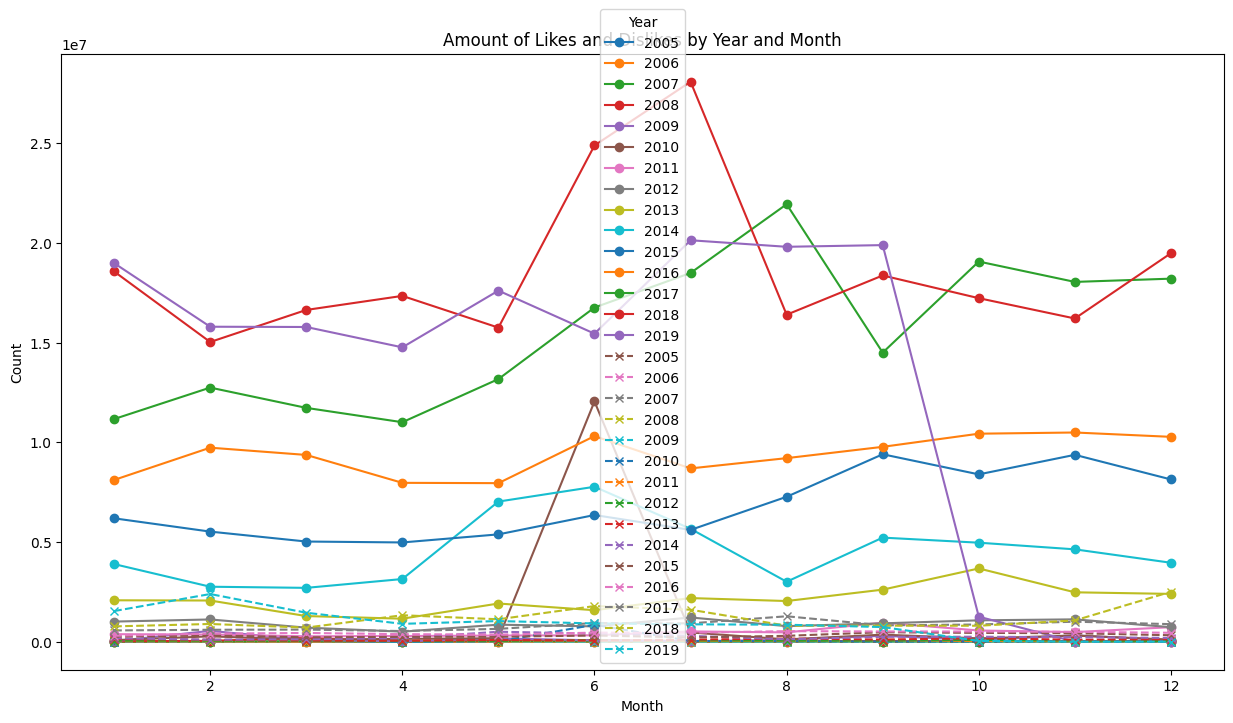

In [14]:
# Group by year and month and sum the like and dislike counts
grouped_likes_dislikes_df = eurocup_df.groupby(['year', 'month'])[['like_count', 'dislike_count']].sum().reset_index()

# Pivot the table to have years as columns and months as rows for likes
pivot_likes_df = grouped_likes_dislikes_df.pivot_table(index='month', columns='year', values='like_count', fill_value=0)

# Pivot the table to have years as columns and months as rows for dislikes
pivot_dislikes_df = grouped_likes_dislikes_df.pivot_table(index='month', columns='year', values='dislike_count', fill_value=0)

# Plot the data for likes and dislikes
fig, ax = plt.subplots(figsize=(15, 8))

pivot_likes_df.plot(kind='line', ax=ax, linestyle='-', marker='o')
pivot_dislikes_df.plot(kind='line', ax=ax, linestyle='--', marker='x')

plt.title('Amount of Likes and Dislikes by Year and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()


In [15]:
eurocup_df.sort_values(by='view_count', ascending=False).head(10)


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
13273,Music,UCGnjeahCJW1AF34HBmQTJ-Q,2019-11-22 21:57:46.893384,630719.0,pRpeEdMmmQ0,211,9570906.0,"empire,Shakiravevo,world cup song,she wolf,aco...",Shakira - Waka Waka (This Time for Africa) (Th...,2010-06-04,2.363314e+09,2010,6,4
807028,Education,UC8s9OjGX4pCnsGQt48lejfw,2019-11-04 19:51:19.348138,1251847.0,pO7074mD6q8,251,2043526.0,"ABC Kids TV Nursery Rhymes,ABC Kids TV,Learn C...",영어 배우기! 알파벳송 인기 تعليم الاطفال مع - العاب أطفال...,2018-12-13,7.970407e+08,2018,12,13
172215,Music,UCVWA4btXTFru9qM06FceSag,2019-10-30 19:51:50.606759,315624.0,TGtWWb9emYI,246,2860895.0,"Mr.305/Polo Grounds Music/RCA Records,Pitbull ...",Pitbull ft. Jennifer Lopez & Claudia Leitte - ...,2014-05-16,7.026111e+08,2014,5,16
13703,Music,UCGnjeahCJW1AF34HBmQTJ-Q,2019-11-22 21:57:45.780054,103779.0,dzsuE5ugxf4,212,1683998.0,"Shakira,empire,Shakiravevo,and rihanna can't r...",Waka Waka (Esto es Africa) (Cancion Oficial de...,2010-06-14,4.117644e+08,2010,6,14
831799,Education,UC9GUxJlPNLRRPM1PZMTW0Rw,2019-11-21 13:35:19.668935,479467.0,XrZjDxgQIkQ,135,819132.0,"Learn Colors,Playground,Sand,children,play edu...",Learn Colors Street Vehicle Soccer ball Slide ...,2019-01-30,3.603743e+08,2019,1,30
241491,Education,UCJkWoS4RsldA1coEIot5yDA,2019-11-20 23:46:39.485877,95789.0,3FszkGtTCCw,3903,154493.0,"ice cream,SAR,counting,#wheelsonthebus,numbers...",Ice Cream Song + More | Nursery Rhymes from Mo...,2015-02-11,2.691781e+08,2015,2,11
801284,Education,UC8s9OjGX4pCnsGQt48lejfw,2019-11-04 19:51:24.705910,444291.0,HJSYWLKQeKM,302,735389.0,"ABC Kids TV Nursery Rhymes,ABC Kids TV,Learn C...",영어 배우기! 알파벳송 인기 تعليم الاطفال مع - العاب أطفال...,2018-12-04,2.688796e+08,2018,12,4
593850,Sports,UCRijo3ddMTht_IHyNSNXpNQ,2019-10-29 17:12:41.621843,83259.0,VJwoSfTOhyM,297,1773573.0,"dude perfect,dude perfect stereotypes,dude per...",Water Bottle Flip 2 | Dude Perfect,2017-11-20,2.345806e+08,2017,11,20
623876,Sports,UCRijo3ddMTht_IHyNSNXpNQ,2019-10-29 17:12:38.486505,93733.0,VRJmcxCrAOA,258,3441660.0,"dude perfect,dude perfect stereotypes,dude per...",Real Life Trick Shots 2 | Dude Perfect,2018-01-22,2.178188e+08,2018,1,22
663388,Education,UC3H2C9wH4dZ0Bq-xYexEL9Q,2019-11-03 20:26:40.313212,240343.0,JMliYjiELek,616,412075.0,"baby toddlers,children,colors,colors for child...",Learn Colors with Lightning Mcqueen Surprise S...,2018-04-20,2.027947e+08,2018,4,20
